<font size="+3"><strong>2.1. Predicting Price with Size</strong></font>

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In this project, you're working for a client who wants to create a model that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD.<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

In [ ]:
VimeoVideo("656704385", h="abf81d298d", width=600)

# Prepare Data

## Import

In the previous project, we cleaned our data files one-by-one. This isn't an issue when you're working with just three files, but imagine if you had several hundred! One way to automate the data importing and cleaning process is by writing a **function**. This will make sure that all our data undergoes the same process, and that our analysis is easily reproducible — something that's very important in science in general and data science in particular. 

In [2]:
VimeoVideo("656703362", h="bae256298f", width=600)

**Task 2.1.1:** Write a function named `wrangle` that takes a file path as an argument and returns a DataFrame.

- [What's a function?](../%40textbook/02-python-advanced.ipynb#Functions)
- [Write a function in Python.](../%40textbook/02-python-advanced.ipynb#Functions) 

In [22]:
def wrangle(filePath):
    df=pd.read_csv(filePath)
    mask_ba=df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt=df["property_type"]=="apartment"
    mask_price=df["price_aprox_usd"]<400_000
    df=df[mask_ba & mask_apt & mask_price]
    low, high=df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area=df["surface_covered_in_m2"].between(low,high)
    df=df[mask_area]
    return df

Now that we have a function written, let's test it out on one of the CSV files we'll use in this project. 

In [4]:
VimeoVideo("656701336", h="c3a3e9bc16", width=600)

**Task 2.1.2:** Use your `wrangle` function to create a DataFrame `df` from the CSV file `data/buenos-aires-real-estate-1.csv`.

In [23]:
df =wrangle("data/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...


At this point, your DataFrame `df` should have no more than 8,606 observations.

For this project, we want to build a model for apartments in Buenos Aires proper (`"Capital Federal"`) that cost less than \$400,000. Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. So our first cleaning task is to remove those observations from our dataset. Since we're using a function to import and clean our data, we'll need to make changes there. 

In [6]:
VimeoVideo("656697884", h="95081c955c", width=600)

In [9]:
# Check your work
assert (
    len(df) <= 1781
), f"`df` should have no more than 1781 observations, not {len(df)}."

**Task 2.1.3:** Add to your `wrangle` function so that the DataFrame it returns only includes apartments in Buenos Aires (`"Capital Federal"`) that cost less than $400,000 USD. Then recreate `df` from `data/buenos-aires-real-estate-1.csv` by re-running the cells above. 

- [Subset a DataFrame with a mask using pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

To check your work, `df` should no have no more than 1,781 observations.

## Explore

We saw in the previous project that property size is an important factor in determining price. With that in mind, let's look at the distribution of apartment sizes in our dataset. 

In [13]:
VimeoVideo("656697539", h="9e0a4673f0", width=600)

**Task 2.1.4:** Create a histogram of `"surface_covered_in_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Apartment Sizes"`.

- [What's a histogram?](../%40textbook/06-visualization-matplotlib.ipynb#Histograms)
- [Create a histogram using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Histograms)

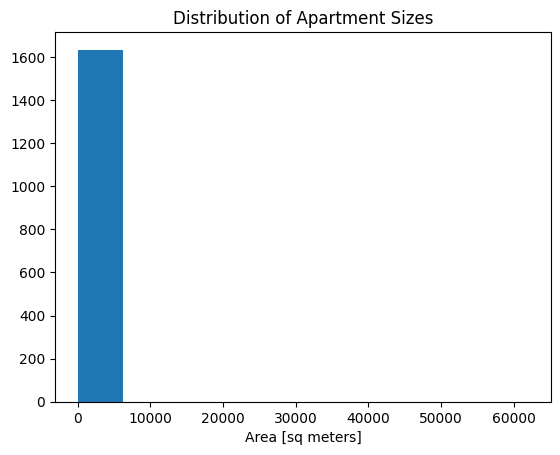

In [12]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");


Yikes! When you see a histogram like the one above, it suggests that there are outliers in your dataset. This can affect model performance — especially in the sorts of linear models we'll learn about in this project. To confirm, let's look at the summary statistics for the `"surface_covered_in_m2"` feature. 

In [14]:
VimeoVideo("656697049", h="649a69e5a2", width=600)

**Task 2.1.5:** Calculate the summary statistics for `df` using the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method. 

- [<span id='term'>What's skewed data?](../%40textbook/05-pandas-summary-statistics.ipynb#Skewed-Distributions)
- [<span id='technique'>Print the summary statistics for a DataFrame using <span id='tool'>pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Working-with-Summary-Statistics)

In [16]:
df.describe()["surface_covered_in_m2"]

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. The best thing to do is to change our `wrangle` function and remove them from the dataset. 

In [18]:
VimeoVideo("656696370", h="a809e66bb8", width=600)

**Task 2.1.6:** Add to your wrangle function so that it removes observations that are outliers in the `"surface_covered_in_m2"` column. Specifically, all observations should fall between the `0.1` and `0.9` quantiles for `"surface_covered_in_m2"`.

- [What's a quantile?](../%40textbook/05-pandas-summary-statistics.ipynb#Calculate-the-Quantiles-for-a-Series)
- [Calculate the quantiles for a Series in pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Calculate-the-Quantiles-for-a-Series)
- [Subset a DataFrame with a mask using pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

When you're done, don't forget to rerun all the cells above. Note how your histogram changes now that there are no outliers. At this point, `df` should have no more than 1,343 observations.

<div class="alert alert-info" role="alert">
    <p><b>Tip:</b> One of the DS Lab students, Fatma Fuad El Sheibany, wrote an <a href="https://learn.wqu.edu/forum-posts/6308afef620321001d81d0ee">excellent forum post</a> on how the order in which you apply masks can affect your data. Check it out!</p>
</div>

In [21]:

mask_area.head()


0     False
4      True
9      True
11    False
20    False
Name: surface_covered_in_m2, dtype: bool

In [24]:
# Check your work
assert len(df) <= 1343

Now that our dataset is free of outliers, it's time to start exploring the relationship between apartment size and price. Let's use one of the tools we learned in the last project.

In [27]:
VimeoVideo("656696079", h="80b4e6ce8e", width=600)

**Task 2.1.7:** Create a scatter plot that shows price (`"price_aprox_usd"`) vs area (`"surface_covered_in_m2"`) in our dataset. Make sure to label your x-axis `"Area [sq meters]"` and your y-axis `"Price [USD]"`.

- [What's a scatter plot?](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)
- [Create a scatter plot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

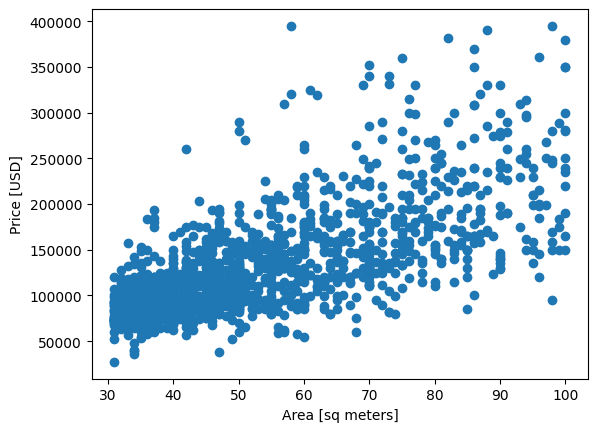

In [28]:
plt.scatter(x=df["surface_covered_in_m2"],y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]");


This plot suggests that there's a moderate positive correlation between apartment price and size. This means that if  thing we want to predict is price, size will be a good feature to include. 

In [ ]:
VimeoVideo("656749759", h="095ad450ac", width=600)

## Split

A key part in any model-building project is separating your **target** (the thing you want to predict) from your **features** (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

In [29]:
VimeoVideo("656688282", h="84ef8e90b3", width=600)

**Task 2.1.8:** Create the feature matrix named `X_train`, which you'll use to train your model. It should contain one feature only: `["surface_covered_in_m2"]`. Remember that your feature matrix should always be two-dimensional. 

- [What's a feature matrix?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [Create a DataFrame from a Series in pandas.](../%40textbook/04-pandas-advanced.ipynb#Select-a-Series-from-a-DataFrame) 

In [30]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [31]:
# Check your work
assert X_train.shape == (
    1343,
    1,
), f"The shape of `X_train` should be (1343, 1), not {X_train.shape}."

Now that we have a features, the next step is to create a target. (By the way, you may have noticed that we're adding a `_train` tag to the variable names for our feature matrix and target vector. This is to remind us that this is the data we'll use to *train* our model, and not the data we'll use to *test* it.)

In [32]:
VimeoVideo("656688065", h="c391dae2e6", width=600)

**Task 2.1.9:** Create the target vector named `y_train`, which you'll use to train your model. Your target should be `"price_aprox_usd"`. Remember that, in most cases, your target vector should be one-dimensional. 

- [What's a target vector?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [Select a Series from a DataFrame in pandas.](../%40textbook/04-pandas-advanced.ipynb#Select-a-Series-from-a-DataFrame) 

In [33]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1343,)

In [34]:
# Check your work
assert y_train.shape == (1343,)

# Build Model

## Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be. 

In [35]:
VimeoVideo("656687537", h="67df9f3bd7", width=600)

**Task 2.1.10:** Calculate the mean of your target vector `y_train` and assign it to the variable `y_mean`.

- [What's a regression problem?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [Calculate summary statistics for a DataFrame or Series in pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Working-with-Summary-Statistics)

In [36]:
y_mean = y_train.mean()
y_mean

135527.83871928515

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset. 

In [37]:
VimeoVideo("656687259", h="684b40ef32", width=600)

**Task 2.1.11:** Create a list named `y_pred_baseline` that contains the value of `y_mean` repeated so that it's the same length at `y`.

- [Calculate the length of a list in Python.](../%40textbook/02-python-advanced.ipynb#Functions)

In [39]:
y_pred_baseline =[y_mean] *len(y_train)

len(y_pred_baseline)

1343

So how does our baseline model perform? One way to evaluate it is by plotting it on top of the scatter plot we made above. 

In [40]:
VimeoVideo("656686948", h="2dbbdccfa4", width=600)

**Task 2.1.12:** Add a line to the plot below that shows the relationship between the observations `X_train` and our dumb model's predictions `y_pred_baseline`. Be sure that the line color is orange, and that it has the label `"Baseline Model"`.

- [What's a line plot?](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)
- [Create a line plot in Matplotlib.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

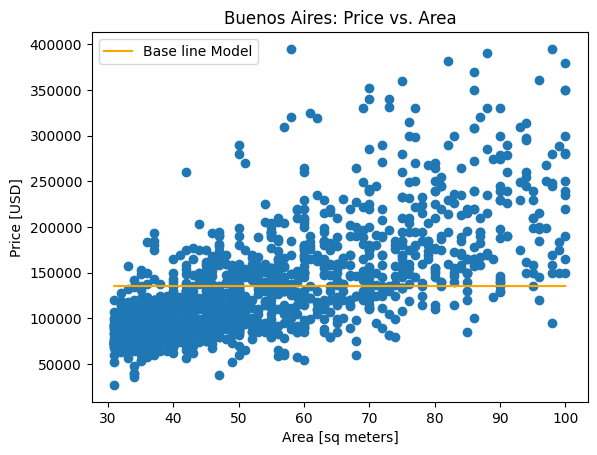

In [42]:
# Add a line to the plot
plt.plot(X_train.values,y_pred_baseline,color="orange",label="Base line Model")

plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate **performance metric**. There are lots of performance metrics, but the one we'll use here is the **mean absolute error**.  

In [43]:
VimeoVideo("656686010", h="214406a99f", width=600)

**Task 2.1.13:** Calculate the baseline mean absolute error for your predictions in `y_pred_baseline` as compared to the true targets in `y`.

- [What's a performance metric?](../%40textbook/12-ml-core.ipynb#Performance-Metrics)
- [What's mean absolute error?](../%40textbook/12-ml-core.ipynb#Performance-Metrics)
- [Calculate the mean absolute error for a list of predictions in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [44]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


What does this information tell us? If we always predicted that an apartment price is \\$135,527.84, our predictions would be off by an average of \\$45,199.46. It also tells us that our model needs to have mean absolute error below \\$45,199.46 in order to be useful. 

## Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. ☕️ Let's get started! 

The first thing we need to do is create our model — in this case, one that uses linear regression.  

In [47]:
VimeoVideo("656685822", h="6b6bce7f3c", width=600)

**Task 2.1.14:** Instantiate a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model named `model`.

- [What's linear regression?](../%40textbook/12-ml-core.ipynb#Model-Types)
- [What's a cost function?](../%40textbook/12-ml-core.ipynb#Cost-Functions)
- [Instantiate a predictor in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)

In [48]:
model = LinearRegression()

In [49]:
# Check your work
assert isinstance(model, LinearRegression)

The second thing we need to do is use our data to train our model. Another way to say this is fit our model to the training data. 

In [46]:
VimeoVideo("656685645", h="444e6e49e7", width=600)

**Task 2.1.15:** Fit your model to the data, `X_train` and `y_train`.

- [Fit a model to training data in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
# Check your work
check_is_fitted(model)

## Evaluate

The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.

In [45]:
VimeoVideo("656685380", h="3b79fe2cdb", width=600)

**Task 2.1.16:** Using your model's [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method, create a list of predictions for the observations in your feature matrix `X_train`. Name this array `y_pred_training`. 

- [Generate predictions using a trained model in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)

In [53]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [54]:
# Check your work
assert (
    len(y_pred_training) == 1343
), f"There should be 1343 predictions in `y_pred_training`, not {len(y_pred_training)}."

Now that we have predictions, we'll use them to assess our model's performance with the training data. We'll use the same metric we used to evaluate our baseline model: mean absolute error. 

In [55]:
VimeoVideo("656685229", h="b668f12bc1", width=600)

**Task 2.1.17:** Calculate your training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.

- [Calculate the mean absolute error for a list of predictions in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [56]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


Good news: Our model beat the baseline by over \$10,000! That's a good indicator that it will be helpful in predicting apartment prices. But the real test is how the model performs on data that it hasn't seen before, data that we call the **test set**. In the future, you'll create your own test set before you train your model, but here we'll use one that's pre-made, and we'll evaluate the model using the WQU auto-grader. 

**Task 2.1.18:** Run the code below to import your test data `buenos-aires-test-features.csv` into a DataFrame and generate a Series of predictions using your model.  After the code runs successfully, click the **Check Activity** button on the left pane to verify your predictions.

- [What's generalizability?](../%40textbook/12-ml-core.ipynb#Generalization)
- [Generate predictions using a trained model in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)
- [Calculate the mean absolute error for a list of predictions in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

<div class="alert alert-block alert-info">
<b>Tip:</b> Make sure the <code>X_train</code> you used to train your model has the same column order as <code>X_test</code>. Otherwise, it may hurt your model's performance.
</div>

In [57]:
X_test = pd.read_csv("data/buenos-aires-test-features.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

Ideally, you want your test performance metrics to be the same as its training performance metrics. In practice, test metrics tend to be a little worse (this means a larger number in the case of mean absolute error). But as long as the training and test performance are close to each other, you can be confident that your model will generalize well. 

<div class="alert alert-block alert-warning">
<p><b>Warning:</b> During the iteration phase, you can change and retrain your model as many times as you want. You can also check the model's training performance repeatedly. But once you evaluate its test performance, you can't make any more changes. 
    
<p>A test only counts if neither the model nor the data scientist has seen the data before. If you check your test metrics and then make changes to the model, you can introduce biases into the model that compromise its generalizability. 
</div>

# Communicate Results

Once your model is built and tested, it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation. When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as:

<center><img src="../images/proj-2.003.png" alt="Equation: y = m*x + b" style="width: 400px;"/></center>

Since data scientists often work with more complicated linear models, they prefer to write the equation as:

<center><img src="../images/proj-2.004.png" alt="Equation: y = beta 0 + beta 1 * x" style="width: 400px;"/></center>

Regardless of how we write the equation, we need to find the values that our model has determined for the intercept and and coefficient. Fortunately, all trained models in scikit-learn store this information in the model itself. Let's start with the intercept.

In [58]:
VimeoVideo("656684478", h="87d29a2ba6", width=600)

**Task 2.1.19:** Extract the intercept from your model, and assign it to the variable `intercept`. 

- [What's an intercept in a linear model?](../%40textbook/12-ml-core.ipynb#Model-Types)
- [Access an attribute of a trained model in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Access-an-Attribute-of-a-Trained-Model)

In [59]:
intercept = round(model.intercept_,2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433.31


Next comes the coefficient. We'll extract it in a very similar way.

In [60]:
VimeoVideo("656684245", h="f96cf91211", width=600)

**Task 2.1.20:** Extract the coefficient associated `"surface_covered_in_m2"` in your model, and assign it to the variable `coefficient`.

- [What's a coefficient in a linear model?](../%40textbook/12-ml-core.ipynb#Model-Types)
- [Access an attribute of a trained model in scikit-learn.](../%40textbook/15-ml-regression.ipynb#Access-an-Attribute-of-a-Trained-Model)

In [61]:
coefficient =round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


Now that we have our `intercept` and `coefficient`, we need to insert them into a string that we can print out the complete equation.

In [ ]:
VimeoVideo("656684037", h="f30c2b4dfc", width=600)

**Task 2.1.21:** Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.

- [What's an f-string?](../%40textbook/02-python-advanced.ipynb#Working-with-f-strings-)

In [ ]:
print(f"apartment_price = {...} + {...} * surface_covered") 

Equation might work for some technical audiences, but visualization or generally much more effective communication tool — especially for non-technical audiences. So let's use the scatter plot we made at the beginning of this lesson and plot the line that that are equation would make.

In [ ]:
VimeoVideo("656683862", h="886904448d", width=600)

**Task 2.1.22:** Add a line to the plot below that shows the relationship between the observations in `X_train` and your model's predictions `y_pred_training`. Be sure that the line color is red, and that it has the label `"Linear Model"`.

- [What's a line plot?](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)
- [Create a line plot in pandas.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

In [ ]:
# Add a line to the plot
...

plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
